# Project 1 Report

Team Members: Owen Finkbeiner and Aman Gangwani

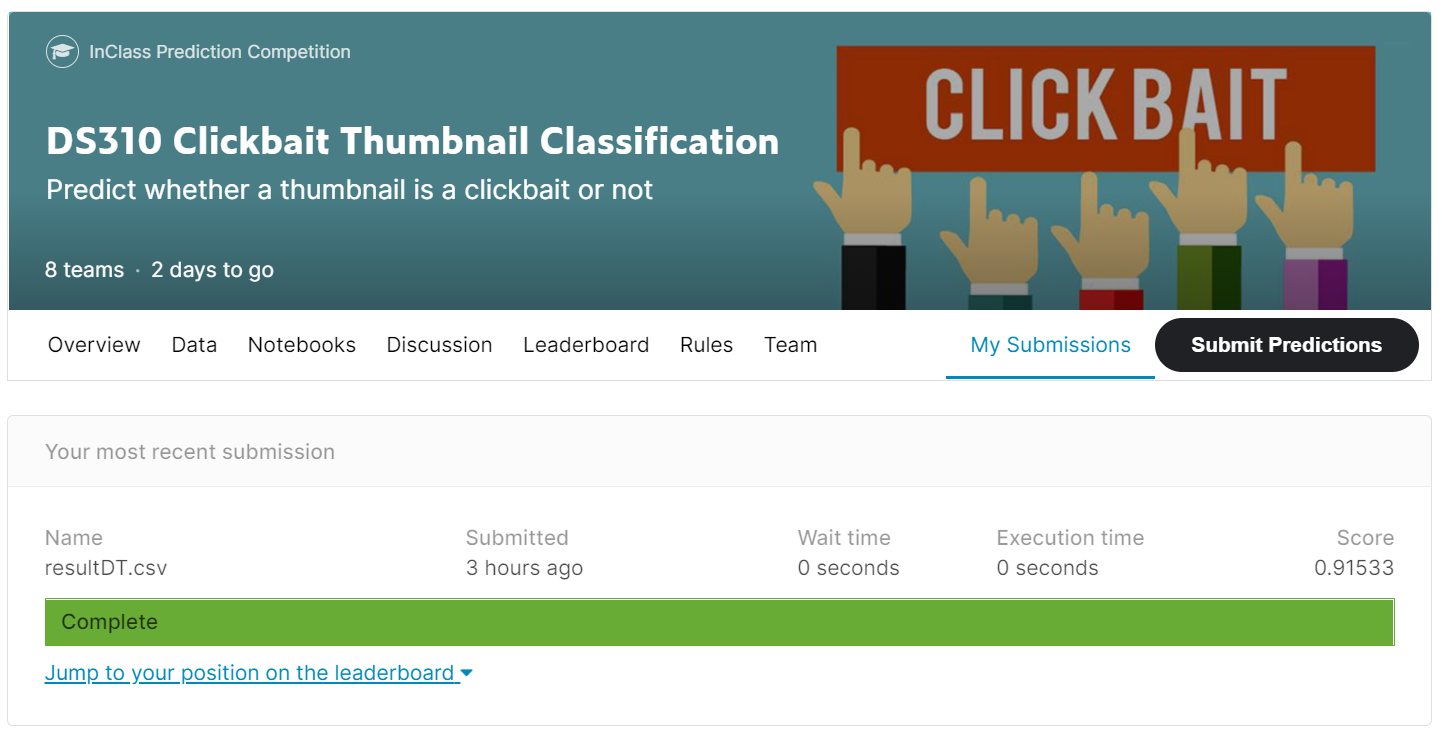

# Introduction to the Problem

YouTube has become a prominent part of our society. "YouTuber" has even become a line of work for many teenagers and young adults, and they will do whatever they can do for clicks. One of the ways that people get views on YouTube is through the use of "clickbait", which is defined by a video that has a title, description, and thumbnail that makes the user think they are going to watch something more entertaining or dramatic than the video that they actually get. In this project, we set out to create a model that identifies some of the common features of clickbait videos and can classify videos as clickbait or not based on those features.

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the data using only the columns from which we can extract meaningful information.

In [83]:
train_data = pd.read_csv("train.csv", usecols=["class", "viewCount", "commentCount", "likeCount", "dislikeCount", "title", 
                                               "description", "user_comment_1", "user_comment_2", "user_comment_3", "user_comment_4",
                                               "user_comment_5", "user_comment_6", "user_comment_7", "user_comment_8",
                                               "user_comment_9", "user_comment_10"]) 
test_data = pd.read_csv("test_1.csv", usecols=["ID","viewCount", "commentCount", "likeCount", "dislikeCount", "title", "description", 
                                               "user_comment_1", "user_comment_2", "user_comment_3", "user_comment_4",
                                               "user_comment_5", "user_comment_6", "user_comment_7", "user_comment_8",
                                               "user_comment_9", "user_comment_10"])

In [84]:
train_data.head()

,title,description,viewCount,likeCount,dislikeCount,commentCount,user_comment_1,user_comment_2,user_comment_3,user_comment_4,user_comment_5,user_comment_6,user_comment_7,user_comment_8,user_comment_9,user_comment_10,class
0,MARZIA HAS LIGMA LWIAY #0044,Become Sponsor: https://youtube.com/pewdiepie/...,10509398.0,945921.0,5614.0,58844,Other man: *touches Marzia's hand*\nPewds: som...,**marzia is in a video**\n\n**pewds quality in...,8:51 Proof that Italians do the hand thing whe...,"Me: Mom can we have LWIAY intro?\nMom: No, we ...",Nobody:\nYoutube: Let's recommend this video 9...,Felix you did not disappoint with that outro,belle delphine: eats pewdiepie\n\n\nMarzia: SO...,The Italian words pewds said roughly translate...,Marzia- how about watching old videos \n\nMe i...,outro: *Fire*\nscreen: *black*\nFelix: is that...,True
1,This Slinky Montage Is Bizarrely Satisfying to...,Happy National Slinky Day! We got our hands on...,4829.0,57.0,81.0,22,neither bizarre nor satisfying. barely watchab...,You could have just played the scene from Ace ...,When the new toy in the office becomes everybo...,"Almost so satisfying, slinky occasionally land...",There is something strangely satisfying in wat...,"Now that I think of it, slinkys are insanely w...",S L I N K Y P O R N,That stairwell is definitely coated in urine.,wtf has happened to your content,They're like unknown creatures moving down the...,False
2,MAKING HER DREAM COME TRUE! (MAKE A WISH),It was so nice to meet you Trinity 😊\nGET NEW ...,1015456.0,36679.0,492.0,3739,Follow me on Instagram @Lance210,Another proof you have a big heart ❤,She still has not used any of that money she i...,Im 12 my name is cyrus and i have severe asthm...,Lance is such a happy and productive person an...,I’ve had something called ugliness since I was...,I loved this u really made them girls day❤,The awkwardness was real😂😂😂!!!!!!,"Awkward, but really cool u could do that for t...",GOD BLESS you Lance,True
3,Science Journalism: Crash Course Statistics #11,We’ve talked a lot in this series about how of...,64629.0,2111.0,24.0,151,"It's not as simple as ""checking the source"". M...","This should go into media literacy, I think, i...",This episode should be correlated with CrashCo...,There's Media Literacy in my Statistics! Nice ...,Ah! She is just lovely! Excellent episode.,Loved the limerick.,"Article: ""a study found a mild correlation bet...",Videos like this should absolutely be regular ...,Love the poetry :-)\nIt's important to know wh...,"Bonus points for ""Partial Foods.""",False
4,"Michelin and General Motors Unveil Airless, Pu...",Michelin and General Motors are betting on nea...,206468.0,1335.0,96.0,470,Perfect can get spike stripped and still outru...,The tires have been in development for so long...,"How will they do on side loads, like high spee...","Michelin chill out, I work in roadside assista...",They look good but I hope it's enough to hold ...,"When you fail to present the downsides, you ju...",I am definitely going to pick up a set of thes...,Yeah but the real questions are; how much road...,They give in a lot. At least it looks like it....,We've seen various versions of this concept fo...,False


# Exploratory Data Analysis

To explore this data, we split the training data into two subsets based on class = True or False (clickbait or not) so that we can look at and compare the distributions of some of the columns between the two subsets. Overall, our findings suggested that clickbait videos generally are viewed more, liked and disliked more, and commented on more than non-clickbait videos, suggesting importance of those columns.

In [85]:
clickbait = train_data[train_data["class"] == True]
not_clickbait = train_data[train_data["class"] == False]

In [86]:
clickbait["viewCount"].describe()

count    3.548000e+03
mean     2.432814e+06
std      5.415902e+06
min      1.326000e+03
25%      3.269015e+05
50%      1.011614e+06
75%      2.763718e+06
max      2.094280e+08
Name: viewCount, dtype: float64

In [87]:
not_clickbait["viewCount"].describe()

count    3.557000e+03
mean     1.438270e+06
std      3.445699e+06
min      1.157000e+03
25%      1.044970e+05
50%      4.542740e+05
75%      1.471811e+06
max      1.136609e+08
Name: viewCount, dtype: float64

In [88]:
clickbait["commentCount"].describe()

count    3.548000e+03
mean     1.032991e+04
std      3.285293e+04
min      2.100000e+01
25%      6.205000e+02
50%      2.593500e+03
75%      9.187000e+03
max      1.167143e+06
Name: commentCount, dtype: float64

In [89]:
not_clickbait["commentCount"].describe()

count      3557.000000
mean       3290.397245
std        8616.744006
min          10.000000
25%         214.000000
50%         944.000000
75%        2999.000000
max      352548.000000
Name: commentCount, dtype: float64

In [90]:
clickbait["likeCount"].describe()

count    3.548000e+03
mean     9.310146e+04
std      2.950570e+05
min      1.010000e+02
25%      7.967000e+03
50%      2.927500e+04
75%      8.002250e+04
max      8.941064e+06
Name: likeCount, dtype: float64

In [91]:
not_clickbait["likeCount"].describe()

count    3.557000e+03
mean     3.542657e+04
std      7.475544e+04
min      1.900000e+01
25%      1.725000e+03
50%      1.087200e+04
75%      3.712900e+04
max      1.032071e+06
Name: likeCount, dtype: float64

In [92]:
clickbait["dislikeCount"].describe()

count      3548.000000
mean       4059.391770
std       17638.917364
min           1.000000
25%         362.000000
50%        1164.000000
75%        3193.750000
max      804903.000000
Name: dislikeCount, dtype: float64

In [93]:
not_clickbait["dislikeCount"].describe()

count      3557.000000
mean       1145.919595
std        3497.490525
min           0.000000
25%          86.000000
50%         358.000000
75%        1088.000000
max      114322.000000
Name: dislikeCount, dtype: float64

# Feature Selection

We knew through the exploratory data analysis that the base of our model would be the quanitative values for view count, like count, dislike count, and comment count. From there, the next step of feature selection was to parse through the string columns (title, description, comments 1-10) to find significant features within those.

First, we looked at the comments. Two of the common occurences in comments within clickbait videos were capital letters and emojis. For the emojis, we had to take a sampling of 200 cases and manually add all emojis used into a list so that we can look for those emojis in the rest of the cases. One of the pitfalls of this feature is that not all emojis are included, however we are confident that we included at least a significant number of them.

In [94]:
emoji_list = ["😂","🔥","💀","👇","🆗","❤️","🐱","😀","🙄","🐶","😝","🙈","😉","😲","❗","💪","🌈","💕","👏","👍🏻","🤦‍♂️",
            "🧠","🧑","👕","👞","😇","🌹","🙂","😍","😘","😠","💘","😑","🙁","🙌🏼","✝️","🧣","🙏🏽","👸🏽","🎟","💙","😢",
             "🤔","😱","😆","😔","😒","█","✌🏻","🙃","😕","😩","🍲","👭","👟","😎","👊","🍪","🚗","🐬","🎄","💜","💖"]

In [95]:
comment1 = train_data["user_comment_1"]
comment2 = train_data["user_comment_2"]
comment3 = train_data["user_comment_3"]
comment4 = train_data["user_comment_4"]
comment5 = train_data["user_comment_5"]
comment6 = train_data["user_comment_6"]
comment7 = train_data["user_comment_7"]
comment8 = train_data["user_comment_8"]
comment9 = train_data["user_comment_9"]
comment0 = train_data["user_comment_10"]

num_emojis1 = []
num_emojis2 = []
num_emojis3 = []
num_emojis4 = []
num_emojis5 = []
num_emojis6 = []
num_emojis7 = []
num_emojis8 = []
num_emojis9 = []
num_emojis0 = []

for i1 in comment1:
    emojis1 = sum(1 for c1 in i1 if c1 in emoji_list)
    num_emojis1.append(emojis1)
    
for i2 in comment2:
    emojis2 = sum(1 for c2 in i2 if c2 in emoji_list)
    num_emojis2.append(emojis2)
    
for i3 in comment3:
    emojis3 = sum(1 for c3 in i3 if c3 in emoji_list)
    num_emojis3.append(emojis3)

for i4 in comment4:
    emojis4 = sum(1 for c4 in i4 if c4 in emoji_list)
    num_emojis4.append(emojis4)
    
for i5 in comment5:
    emojis5 = sum(1 for c5 in i5 if c5 in emoji_list)
    num_emojis5.append(emojis5)
    
for i6 in comment6:
    emojis6 = sum(1 for c6 in i6 if c6 in emoji_list)
    num_emojis6.append(emojis6)
    
for i7 in comment7:
    emojis7 = sum(1 for c7 in i7 if c7 in emoji_list)
    num_emojis7.append(emojis7)
    
for i8 in comment8:
    emojis8 = sum(1 for c8 in i8 if c8 in emoji_list)
    num_emojis8.append(emojis8)
    
for i9 in comment9:
    emojis9 = sum(1 for c9 in i9 if c9 in emoji_list)
    num_emojis9.append(emojis9)
    
for i0 in comment0:
    emojis0 = sum(1 for c0 in i0 if c0 in emoji_list)
    num_emojis0.append(emojis0)
    
train_data["emojis_1"] = num_emojis1
train_data["emojis_2"] = num_emojis2
train_data["emojis_3"] = num_emojis3
train_data["emojis_4"] = num_emojis4
train_data["emojis_5"] = num_emojis5
train_data["emojis_6"] = num_emojis6
train_data["emojis_7"] = num_emojis7
train_data["emojis_8"] = num_emojis8
train_data["emojis_9"] = num_emojis9
train_data["emojis_0"] = num_emojis0

train_data["emojis_comments"] = train_data["emojis_1"] + train_data["emojis_2"] + train_data["emojis_3"] + train_data["emojis_4"] + train_data["emojis_5"] + train_data["emojis_6"] + train_data["emojis_7"] + train_data["emojis_8"] + train_data["emojis_9"] + train_data["emojis_0"]
train_data = train_data.drop(["emojis_1","emojis_2","emojis_3","emojis_4","emojis_5","emojis_6","emojis_7","emojis_8","emojis_9","emojis_0"], axis=1)

In [96]:
comment1 = test_data["user_comment_1"]
comment2 = test_data["user_comment_2"]
comment3 = test_data["user_comment_3"]
comment4 = test_data["user_comment_4"]
comment5 = test_data["user_comment_5"]
comment6 = test_data["user_comment_6"]
comment7 = test_data["user_comment_7"]
comment8 = test_data["user_comment_8"]
comment9 = test_data["user_comment_9"]
comment0 = test_data["user_comment_10"]

num_emojis1 = []
num_emojis2 = []
num_emojis3 = []
num_emojis4 = []
num_emojis5 = []
num_emojis6 = []
num_emojis7 = []
num_emojis8 = []
num_emojis9 = []
num_emojis0 = []

for i1 in comment1:
    emojis1 = sum(1 for c1 in i1 if c1 in emoji_list)
    num_emojis1.append(emojis1)
    
for i2 in comment2:
    emojis2 = sum(1 for c2 in i2 if c2 in emoji_list)
    num_emojis2.append(emojis2)
    
for i3 in comment3:
    emojis3 = sum(1 for c3 in i3 if c3 in emoji_list)
    num_emojis3.append(emojis3)

for i4 in comment4:
    emojis4 = sum(1 for c4 in i4 if c4 in emoji_list)
    num_emojis4.append(emojis4)
    
for i5 in comment5:
    emojis5 = sum(1 for c5 in i5 if c5 in emoji_list)
    num_emojis5.append(emojis5)
    
for i6 in comment6:
    emojis6 = sum(1 for c6 in i6 if c6 in emoji_list)
    num_emojis6.append(emojis6)
    
for i7 in comment7:
    emojis7 = sum(1 for c7 in i7 if c7 in emoji_list)
    num_emojis7.append(emojis7)
    
for i8 in comment8:
    emojis8 = sum(1 for c8 in i8 if c8 in emoji_list)
    num_emojis8.append(emojis8)
    
for i9 in comment9:
    emojis9 = sum(1 for c9 in i9 if c9 in emoji_list)
    num_emojis9.append(emojis9)
    
for i0 in comment0:
    emojis0 = sum(1 for c0 in i0 if c0 in emoji_list)
    num_emojis0.append(emojis0)
    
test_data["emojis_1"] = num_emojis1
test_data["emojis_2"] = num_emojis2
test_data["emojis_3"] = num_emojis3
test_data["emojis_4"] = num_emojis4
test_data["emojis_5"] = num_emojis5
test_data["emojis_6"] = num_emojis6
test_data["emojis_7"] = num_emojis7
test_data["emojis_8"] = num_emojis8
test_data["emojis_9"] = num_emojis9
test_data["emojis_0"] = num_emojis0

test_data["emojis_comments"] = test_data["emojis_1"] + test_data["emojis_2"] + test_data["emojis_3"] + test_data["emojis_4"] + test_data["emojis_5"] + test_data["emojis_6"] + test_data["emojis_7"] + test_data["emojis_8"] + test_data["emojis_9"] + test_data["emojis_0"]
test_data = test_data.drop(["emojis_1","emojis_2","emojis_3","emojis_4","emojis_5","emojis_6","emojis_7","emojis_8","emojis_9","emojis_0"], axis=1)

EDA of emoji feature: As you can see, a few outliers are heavily skewing the data. There does not seem to be a significant difference in emojis between clickbait and non-clickbait videos overall, but the feature may still be important.

In [97]:
clickbait = train_data[train_data["class"] == True]
not_clickbait = train_data[train_data["class"] == False]

In [98]:
clickbait["emojis_comments"].describe()

count    3548.000000
mean        4.324126
std        34.106300
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max      1499.000000
Name: emojis_comments, dtype: float64

In [99]:
not_clickbait["emojis_comments"].describe()

count    3557.000000
mean        1.734327
std        10.581623
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       411.000000
Name: emojis_comments, dtype: float64

In [100]:
comment1 = train_data["user_comment_1"]
comment2 = train_data["user_comment_2"]
comment3 = train_data["user_comment_3"]
comment4 = train_data["user_comment_4"]
comment5 = train_data["user_comment_5"]
comment6 = train_data["user_comment_6"]
comment7 = train_data["user_comment_7"]
comment8 = train_data["user_comment_8"]
comment9 = train_data["user_comment_9"]
comment0 = train_data["user_comment_10"]

num_upper1 = []
num_upper2 = []
num_upper3 = []
num_upper4 = []
num_upper5 = []
num_upper6 = []
num_upper7 = []
num_upper8 = []
num_upper9 = []
num_upper0 = []

num_lower1 = []
num_lower2 = []
num_lower3 = []
num_lower4 = []
num_lower5 = []
num_lower6 = []
num_lower7 = []
num_lower8 = []
num_lower9 = []
num_lower0 = []

for i1 in comment1:
    upper1 = sum(1 for c1 in i1 if c1.isupper())
    num_upper1.append(upper1)
    lower1 = sum(1 for c1 in i1 if c1.islower())
    num_lower1.append(lower1)
    
for i2 in comment2:
    upper2 = sum(1 for c2 in i2 if c2.islower())
    num_upper2.append(upper2)
    lower2 = sum(1 for c2 in i2 if c2.islower())
    num_lower2.append(lower2)
    
for i3 in comment3:
    upper3 = sum(1 for c3 in i3 if c3.isupper())
    num_upper3.append(upper3)
    lower3 = sum(1 for c3 in i3 if c3.islower())
    num_lower3.append(lower3)

for i4 in comment4:
    upper4 = sum(1 for c4 in i4 if c4.isupper())
    num_upper4.append(upper4)
    lower4 = sum(1 for c4 in i4 if c4.islower())
    num_lower4.append(lower4)
    
for i5 in comment5:
    upper5 = sum(1 for c5 in i5 if c5.isupper())
    num_upper5.append(upper5)
    lower5 = sum(1 for c5 in i5 if c5.islower())
    num_lower5.append(lower5)
    
for i6 in comment6:
    upper6 = sum(1 for c6 in i6 if c6.isupper())
    num_upper6.append(upper6)
    lower6 = sum(1 for c6 in i6 if c6.islower())
    num_lower6.append(lower6)
    
for i7 in comment7:
    upper7 = sum(1 for c7 in i7 if c7.isupper())
    num_upper7.append(upper7)
    lower7 = sum(1 for c7 in i7 if c7.islower())
    num_lower7.append(lower7)
    
for i8 in comment8:
    upper8 = sum(1 for c8 in i8 if c8.isupper())
    num_upper8.append(upper8)
    lower8 = sum(1 for c8 in i8 if c8.islower())
    num_lower8.append(lower8)
    
for i9 in comment9:
    upper9 = sum(1 for c9 in i9 if c9.isupper())
    num_upper9.append(upper9)
    lower9 = sum(1 for c9 in i9 if c9.islower())
    num_lower9.append(lower9)
    
for i0 in comment0:
    upper0 = sum(1 for c0 in i0 if c0.isupper())
    num_upper0.append(upper0)
    lower0 = sum(1 for c0 in i0 if c0.islower())
    num_lower0.append(lower0)
    
train_data["upper_1"] = num_upper1
train_data["upper_2"] = num_upper2
train_data["upper_3"] = num_upper3
train_data["upper_4"] = num_upper4
train_data["upper_5"] = num_upper5
train_data["upper_6"] = num_upper6
train_data["upper_7"] = num_upper7
train_data["upper_8"] = num_upper8
train_data["upper_9"] = num_upper9
train_data["upper_0"] = num_upper0

train_data["lower_1"] = num_lower1
train_data["lower_2"] = num_lower2
train_data["lower_3"] = num_lower3
train_data["lower_4"] = num_lower4
train_data["lower_5"] = num_lower5
train_data["lower_6"] = num_lower6
train_data["lower_7"] = num_lower7
train_data["lower_8"] = num_lower8
train_data["lower_9"] = num_lower9
train_data["lower_0"] = num_lower0

train_data["upper_comments"] = train_data["upper_1"] + train_data["upper_2"] + train_data["upper_3"] + train_data["upper_4"] + train_data["upper_5"] + train_data["upper_6"] + train_data["upper_7"] + train_data["upper_8"] + train_data["upper_9"] + train_data["upper_0"]
train_data = train_data.drop(["upper_1","upper_2","upper_3","upper_4","upper_5","upper_6","upper_7","upper_8","upper_9","upper_0"], axis=1)

train_data["lower_comments"] = train_data["lower_1"] + train_data["lower_2"] + train_data["lower_3"] + train_data["lower_4"] + train_data["lower_5"] + train_data["lower_6"] + train_data["lower_7"] + train_data["lower_8"] + train_data["lower_9"] + train_data["lower_0"]
train_data = train_data.drop(["lower_1","lower_2","lower_3","lower_4","lower_5","lower_6","lower_7","lower_8","lower_9","lower_0"], axis=1)

train_data["percent_upper_comments"] = train_data["upper_comments"] / (train_data["upper_comments"] + train_data["lower_comments"])
train_data["percent_upper_comments"] = train_data["percent_upper_comments"].fillna(0)

train_data = train_data.drop(["user_comment_1","user_comment_2","user_comment_3","user_comment_4","user_comment_5","user_comment_6","user_comment_7","user_comment_8","user_comment_9","user_comment_10"], axis=1)

In [101]:
comment1 = test_data["user_comment_1"]
comment2 = test_data["user_comment_2"]
comment3 = test_data["user_comment_3"]
comment4 = test_data["user_comment_4"]
comment5 = test_data["user_comment_5"]
comment6 = test_data["user_comment_6"]
comment7 = test_data["user_comment_7"]
comment8 = test_data["user_comment_8"]
comment9 = test_data["user_comment_9"]
comment0 = test_data["user_comment_10"]

num_upper1 = []
num_upper2 = []
num_upper3 = []
num_upper4 = []
num_upper5 = []
num_upper6 = []
num_upper7 = []
num_upper8 = []
num_upper9 = []
num_upper0 = []

num_lower1 = []
num_lower2 = []
num_lower3 = []
num_lower4 = []
num_lower5 = []
num_lower6 = []
num_lower7 = []
num_lower8 = []
num_lower9 = []
num_lower0 = []

for i1 in comment1:
    upper1 = sum(1 for c1 in i1 if c1.isupper())
    num_upper1.append(upper1)
    lower1 = sum(1 for c1 in i1 if c1.islower())
    num_lower1.append(lower1)
    
for i2 in comment2:
    upper2 = sum(1 for c2 in i2 if c2.islower())
    num_upper2.append(upper2)
    lower2 = sum(1 for c2 in i2 if c2.islower())
    num_lower2.append(lower2)
    
for i3 in comment3:
    upper3 = sum(1 for c3 in i3 if c3.isupper())
    num_upper3.append(upper3)
    lower3 = sum(1 for c3 in i3 if c3.islower())
    num_lower3.append(lower3)

for i4 in comment4:
    upper4 = sum(1 for c4 in i4 if c4.isupper())
    num_upper4.append(upper4)
    lower4 = sum(1 for c4 in i4 if c4.islower())
    num_lower4.append(lower4)
    
for i5 in comment5:
    upper5 = sum(1 for c5 in i5 if c5.isupper())
    num_upper5.append(upper5)
    lower5 = sum(1 for c5 in i5 if c5.islower())
    num_lower5.append(lower5)
    
for i6 in comment6:
    upper6 = sum(1 for c6 in i6 if c6.isupper())
    num_upper6.append(upper6)
    lower6 = sum(1 for c6 in i6 if c6.islower())
    num_lower6.append(lower6)
    
for i7 in comment7:
    upper7 = sum(1 for c7 in i7 if c7.isupper())
    num_upper7.append(upper7)
    lower7 = sum(1 for c7 in i7 if c7.islower())
    num_lower7.append(lower7)
    
for i8 in comment8:
    upper8 = sum(1 for c8 in i8 if c8.isupper())
    num_upper8.append(upper8)
    lower8 = sum(1 for c8 in i8 if c8.islower())
    num_lower8.append(lower8)
    
for i9 in comment9:
    upper9 = sum(1 for c9 in i9 if c9.isupper())
    num_upper9.append(upper9)
    lower9 = sum(1 for c9 in i9 if c9.islower())
    num_lower9.append(lower9)
    
for i0 in comment0:
    upper0 = sum(1 for c0 in i0 if c0.isupper())
    num_upper0.append(upper0)
    lower0 = sum(1 for c0 in i0 if c0.islower())
    num_lower0.append(lower0)
    
test_data["upper_1"] = num_upper1
test_data["upper_2"] = num_upper2
test_data["upper_3"] = num_upper3
test_data["upper_4"] = num_upper4
test_data["upper_5"] = num_upper5
test_data["upper_6"] = num_upper6
test_data["upper_7"] = num_upper7
test_data["upper_8"] = num_upper8
test_data["upper_9"] = num_upper9
test_data["upper_0"] = num_upper0

test_data["lower_1"] = num_lower1
test_data["lower_2"] = num_lower2
test_data["lower_3"] = num_lower3
test_data["lower_4"] = num_lower4
test_data["lower_5"] = num_lower5
test_data["lower_6"] = num_lower6
test_data["lower_7"] = num_lower7
test_data["lower_8"] = num_lower8
test_data["lower_9"] = num_lower9
test_data["lower_0"] = num_lower0

test_data["upper_comments"] = test_data["upper_1"] + test_data["upper_2"] + test_data["upper_3"] + test_data["upper_4"] + test_data["upper_5"] + test_data["upper_6"] + test_data["upper_7"] + test_data["upper_8"] + test_data["upper_9"] + test_data["upper_0"]
test_data = test_data.drop(["upper_1","upper_2","upper_3","upper_4","upper_5","upper_6","upper_7","upper_8","upper_9","upper_0"], axis=1)

test_data["lower_comments"] = test_data["lower_1"] + test_data["lower_2"] + test_data["lower_3"] + test_data["lower_4"] + test_data["lower_5"] + test_data["lower_6"] + test_data["lower_7"] + test_data["lower_8"] + test_data["lower_9"] + test_data["lower_0"]
test_data = test_data.drop(["lower_1","lower_2","lower_3","lower_4","lower_5","lower_6","lower_7","lower_8","lower_9","lower_0"], axis=1)

test_data["percent_upper_comments"] = test_data["upper_comments"] / (test_data["upper_comments"] + test_data["lower_comments"])
test_data["percent_upper_comments"] = test_data["percent_upper_comments"].fillna(0)

test_data = test_data.drop(["user_comment_1","user_comment_2","user_comment_3","user_comment_4","user_comment_5","user_comment_6","user_comment_7","user_comment_8","user_comment_9","user_comment_10"], axis=1)

EDA: The percentage of letters that are uppercase in the comments tends to be slightly greater for clickbait videos.

In [102]:
clickbait = train_data[train_data["class"] == True]
not_clickbait = train_data[train_data["class"] == False]

In [103]:
clickbait["percent_upper_comments"].describe()

count    3548.000000
mean        0.165942
std         0.078101
min         0.000000
25%         0.112415
50%         0.153610
75%         0.206255
max         0.921245
Name: percent_upper_comments, dtype: float64

In [104]:
not_clickbait["percent_upper_comments"].describe()

count    3557.000000
mean        0.138513
std         0.061638
min         0.019640
25%         0.096251
50%         0.127443
75%         0.168850
max         0.643899
Name: percent_upper_comments, dtype: float64

We created the same capital letter feature for title and description as well as how many exclamation points appeared.

In [105]:
titlesTrain = train_data["title"]

uppercase = []
lowercase = []
exclamations = []

for i in titlesTrain:
    isupper = sum(1 for c in i if c.isupper())
    islower = sum(1 for c in i if c.islower())
    isexclamation = sum(1 for c in i if c == "!")
    uppercase.append(isupper)
    lowercase.append(islower)
    exclamations.append(isexclamation)
    
train_data["uppercaseTitle"] = uppercase
train_data["lowercaseTitle"] = lowercase
train_data["exclamationsTitle"] = exclamations

train_data["percentUpperTitle"] = train_data["uppercaseTitle"] / (train_data["uppercaseTitle"] + train_data["lowercaseTitle"])

In [106]:
titlesTest = test_data["title"]

uppercase = []
lowercase = []
exclamations = []
for i in titlesTest:
    isupper = sum(1 for c in i if c.isupper())
    islower = sum(1 for c in i if c.islower())
    isexclamation = sum(1 for c in i if c == "!")
    uppercase.append(isupper)
    lowercase.append(islower)
    exclamations.append(isexclamation)
    
test_data["uppercaseTitle"] = uppercase
test_data["lowercaseTitle"] = lowercase
test_data["exclamationsTitle"] = exclamations

test_data["percentUpperTitle"] = test_data["uppercaseTitle"] / (test_data["uppercaseTitle"] + test_data["lowercaseTitle"])

In [107]:
descriptionsTrain = train_data["description"]

uppercase = []
lowercase = []
exclamations = []

for i in descriptionsTrain:
    isupper = sum(1 for c in i if c.isupper())
    islower = sum(1 for c in i if c.islower())
    isexclamation = sum(1 for c in i if c == "!")
    uppercase.append(isupper)
    lowercase.append(islower)
    exclamations.append(isexclamation)
    
train_data["uppercaseDescription"] = uppercase
train_data["lowercaseDescription"] = lowercase
train_data["exclamationsDescription"] = exclamations

train_data["percentUpperDescription"] = train_data["uppercaseDescription"] / (train_data["uppercaseDescription"] + train_data["lowercaseDescription"])

In [108]:
descriptionsTest = test_data["description"]

uppercase = []
lowercase = []
exclamations = []

for i in descriptionsTest:
    isupper = sum(1 for c in i if c.isupper())
    islower = sum(1 for c in i if c.islower())
    isexclamation = sum(1 for c in i if c == "!")
    uppercase.append(isupper)
    lowercase.append(islower)
    exclamations.append(isexclamation)
    
test_data["uppercaseDescription"] = uppercase
test_data["lowercaseDescription"] = lowercase
test_data["exclamationsDescription"] = exclamations

test_data["percentUpperDescription"] = test_data["uppercaseDescription"] / (test_data["uppercaseDescription"] + test_data["lowercaseDescription"])

EDA: The percentage of uppercase letters in the title and description have very different distributions for clickbait and non-clickbait videos. Clickbait videos tend to have 3x the amount of capital letters in the title, 1.5% the amount of capital letters in the description, and more than 5x as many exclamations in the title compared to non-clickbait videos.

In [109]:
clickbait = train_data[train_data["class"] == True]
not_clickbait = train_data[train_data["class"] == False]

In [110]:
clickbait["percentUpperTitle"].describe()

count    3548.000000
mean        0.528901
std         0.352671
min         0.000000
25%         0.208333
50%         0.423660
75%         1.000000
max         1.000000
Name: percentUpperTitle, dtype: float64

In [111]:
not_clickbait["percentUpperTitle"].describe()

count    3557.000000
mean        0.166676
std         0.122550
min         0.000000
25%         0.097561
50%         0.157895
75%         0.200000
max         1.000000
Name: percentUpperTitle, dtype: float64

In [112]:
clickbait["percentUpperDescription"].describe()

count    3548.000000
mean        0.189537
std         0.130610
min         0.000000
25%         0.072044
50%         0.156962
75%         0.286047
max         0.797980
Name: percentUpperDescription, dtype: float64

In [113]:
not_clickbait["percentUpperDescription"].describe()

count    3557.000000
mean        0.124465
std         0.068305
min         0.007194
25%         0.074830
50%         0.114943
75%         0.156977
max         0.430769
Name: percentUpperDescription, dtype: float64

In [114]:
clickbait["exclamationsTitle"].describe()

count    3548.000000
mean        0.435457
std         0.766183
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: exclamationsTitle, dtype: float64

In [115]:
not_clickbait["exclamationsTitle"].describe()

count    3557.000000
mean        0.086028
std         0.300766
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: exclamationsTitle, dtype: float64

Here we took the subset of train_data and test_data that we need based on our feature selection.

In [116]:
Y_train = train_data["class"]

X_train = train_data[["viewCount","likeCount","dislikeCount","commentCount","percentUpperTitle","exclamationsTitle","percentUpperDescription","emojis_comments","percent_upper_comments"]]

X_test = test_data[["viewCount","likeCount","dislikeCount","commentCount","percentUpperTitle","exclamationsTitle","percentUpperDescription","emojis_comments","percent_upper_comments"]]

In [117]:
X_train.isna().sum()

viewCount                  0
likeCount                  0
dislikeCount               0
commentCount               0
percentUpperTitle          0
exclamationsTitle          0
percentUpperDescription    0
emojis_comments            0
percent_upper_comments     0
dtype: int64

In [118]:
Y_train.describe()

count      7105
unique        2
top       False
freq       3557
Name: class, dtype: object

In [119]:
X_train.head()

,viewCount,likeCount,dislikeCount,commentCount,percentUpperTitle,exclamationsTitle,percentUpperDescription,emojis_comments,percent_upper_comments
0,10509398.0,945921.0,5614.0,58844,1.000000,0,0.123025,1,0.193861
1,4829.0,57.0,81.0,22,0.155556,0,0.157895,0,0.143418
2,1015456.0,36679.0,492.0,3739,1.000000,1,0.425791,3,0.065274
3,64629.0,2111.0,24.0,151,0.131579,0,0.102289,0,0.143101
4,206468.0,1335.0,96.0,470,0.127273,0,0.094955,0,0.142857


In [120]:
X_test.head()

,viewCount,likeCount,dislikeCount,commentCount,percentUpperTitle,exclamationsTitle,percentUpperDescription,emojis_comments,percent_upper_comments
0,137551.0,2810.0,184.0,242,0.219512,0,0.030208,0,0.140884
1,1158511.0,26708.0,572.0,425,0.190476,0,0.090909,1,0.093870
2,19861.0,326.0,40.0,34,0.153846,0,0.057915,0,0.125000
3,1562674.0,45858.0,887.0,3328,0.250000,1,0.152027,5,0.456049
4,4873500.0,59900.0,1490.0,7388,0.187500,1,0.147321,6,0.126850


We used StandardScaler to standardize each of the features.

In [121]:
scaler = StandardScaler()
scaler.fit(X_train)
train_transform = scaler.transform(X_train)
X_train = pd.DataFrame(train_transform)
test_transform = scaler.transform(X_test)
X_test = pd.DataFrame(test_transform)

# Model Selection

We trained a baseline model for a number of classification algorithms. Of these 4 classification models, the decision tree classifier performed the best with an f1 score of 0.8867 before hyperparameter tuning.

In [122]:
svc = SVC()
svc.fit(X_train, Y_train)
model_pred = svc.predict(X_train)

svc_scores = cross_val_score(svc, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(svc_scores)
print('cv_scores mean:{}'.format(np.mean(svc_scores)))

[0.85693431 0.85109489 0.8558952  0.85003658 0.86357039]
cv_scores mean:0.8555062723807781


In [123]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
model_pred = dt.predict(X_train)

dt_scores = cross_val_score(dt, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(dt_scores)
print('cv_scores mean:{}'.format(np.mean(dt_scores)))

[0.88642659 0.89577465 0.87694484 0.89127325 0.88935574]
cv_scores mean:0.8879550135638656


In [124]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
model_pred = lr.predict(X_train)

lr_scores = cross_val_score(lr, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(lr_scores)
print('cv_scores mean:{}'.format(np.mean(lr_scores)))

[0.76935229 0.75732899 0.75906527 0.73505654 0.77308294]
cv_scores mean:0.7587772071517846


In [125]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
model_pred = nb.predict(X_train)

nb_scores = cross_val_score(nb, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(nb_scores)
print('cv_scores mean:{}'.format(np.mean(nb_scores)))

[0.70829769 0.68214286 0.69791667 0.68233246 0.71270247]
cv_scores mean:0.6966784298895444


We used a RandomizedSearchCV to parse through and find the maximum depth and minimum samples per leaf that gives us the highest f1 score.

In [126]:
hyperparameters = dict()

hyperparameters["min_samples_leaf"] = list(range(1,50))
hyperparameters["max_depth"] = list(range(1,30))

In [127]:
search = RandomizedSearchCV(dt, hyperparameters, scoring='f1', cv=5)

In [128]:
result = search.fit(X_train, Y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8908660282771865
Best Hyperparameters: {'min_samples_leaf': 3, 'max_depth': 23}


In [129]:
depth = result.best_params_['max_depth']
min_samples = result.best_params_['min_samples_leaf']

We then used an AdaBoost ensemble method along with the decision tree classifier to achieve greater performance.

In [130]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth = depth, min_samples_split = min_samples), learning_rate=0.5, random_state=0)

score = np.mean(cross_val_score(clf, X_train, Y_train, scoring = "f1"))
score

0.9293910874240967

# Results and Analysis

After the original model ran, we achieved an F1 of 0.929 using cross validation. Finally, using feature importance graphs, we determined that feature 5 (exclamations in title) was not important to the model, so we decided to drop it.

Feature: 0, Score: 0.02894
Feature: 1, Score: 0.07425
Feature: 2, Score: 0.13142
Feature: 3, Score: 0.23919
Feature: 4, Score: 0.09773
Feature: 5, Score: 0.00549
Feature: 6, Score: 0.27622
Feature: 7, Score: 0.03663
Feature: 8, Score: 0.11013


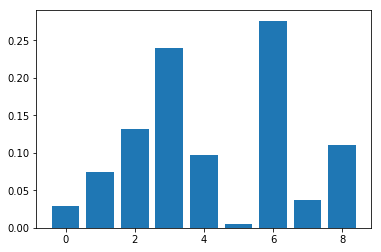

In [131]:
clf.fit(X_train, Y_train)

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [132]:
X_train = X_train.drop([5], axis=1)
X_test = X_test.drop([5], axis=1)

In [133]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth = depth, min_samples_split = min_samples), learning_rate=0.5, random_state=0)

score = np.mean(cross_val_score(clf, X_train, Y_train, scoring = "f1"))
score

0.9247454967369656

Feature: 0, Score: 0.09130
Feature: 1, Score: 0.19590
Feature: 2, Score: 0.04773
Feature: 3, Score: 0.15916
Feature: 4, Score: 0.13160
Feature: 5, Score: 0.21777
Feature: 6, Score: 0.05299
Feature: 7, Score: 0.10356


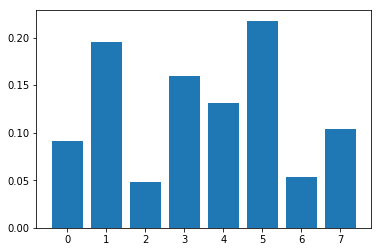

In [134]:
clf.fit(X_train, Y_train)

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

This is our confusion matrix for the model. The precision is 0.93 compared to a recall of 0.90, so our model is slightly more likely to misclassify a clickbait video as not-clickbait, as opposed to the opposite.

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
 

train = X_train
Y = Y_train
 

X_train1, X_test1, y_train1, y_test1 = train_test_split(train, Y, test_size=0.33, random_state=42)
 
clf.fit(X_train1, y_train1)
 
predictions = clf.predict(X_test1)
 
confusion_matrix(y_test1, predictions)

array([[1094,   79],
       [ 117, 1055]], dtype=int64)

In [143]:
from sklearn.metrics import classification_report

classification_report(y_test1, predictions)

'             precision    recall  f1-score   support\n\n      False       0.90      0.93      0.92      1173\n       True       0.93      0.90      0.92      1172\n\navg / total       0.92      0.92      0.92      2345\n'

# Predict on the Test Set

Below shows our implementation of the model to predict on the test set.

In [135]:
clf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=23,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=0)

In [136]:
Y_pred = clf.predict(X_test)
Y_pred_df = pd.DataFrame(data=Y_pred)
test_data["class"] = Y_pred_df[0]

In [137]:
result = test_data[["ID","class"]]
result.to_csv("resultDT.csv", index=False)
result.head()

,ID,class
0,oRB8lJynqBA,True
1,of-UPoEnw_w,False
2,d28cz00HHto,False
3,Tftg_LnwTW0,False
4,qR0mkm65Whk,False


In [138]:
result.describe()

,ID,class
count,646,646
unique,646,2
top,hAAhOQluxwQ,False
freq,1,328


# Model Applicability

This is a model that would be helpful for someone to use in a real life setting. Given the predictive performance with a 0.92 F1 score, we would feel confident selling this model to an interested party. The practical application would be for YouTube or a similar company to be able to flag videos that may potentially be clickbait in order to deter this practice on their website. Given this practical use, it is good that we erred on the side of caution with a lower recall compared to precision, so we are not having too many videos be incorrectly labeled as clickbait.